# Oyster Transcriptome QC
Quality control and assembly metrics of v2 oyster transcriptome assembled using Trinity 2.6.5. Following recommendations by [Harvard FAS](https://informatics.fas.harvard.edu/best-practices-for-de-novo-transcriptome-assembly-with-trinity.html).

In [1]:
%%sh
/home/t.cri.ksilliman/Downloads/trinityrnaseq-Trinity-v2.6.5/util/TrinityStats.pl /scratch/t.cri.ksilliman/OA_RNA/Oyster/oyster-Trinity-v2/Trinity.fasta > Oysterv2_assembly.metrics

In [2]:
%cat Oysterv2_assembly.metrics



################################
## Counts of transcripts, etc.
################################
Total trinity 'genes':	202508
Total trinity transcripts:	478591
Percent GC: 39.12

########################################
Stats based on ALL transcript contigs:
########################################

	Contig N10: 4308
	Contig N20: 2928
	Contig N30: 2159
	Contig N40: 1618
	Contig N50: 1197

	Median contig length: 426
	Average contig: 760.11
	Total assembled bases: 363781240


#####################################################
## Stats based on ONLY LONGEST ISOFORM per 'GENE':
#####################################################

	Contig N10: 4154
	Contig N20: 2707
	Contig N30: 1902
	Contig N40: 1326
	Contig N50: 919

	Median contig length: 346
	Average contig: 627.59
	Total assembled bases: 127092137





## Assessing read support

In [ ]:
%%sh
module load gcc/6.2.0
module load bowtie2/2.3.2

bowtie2-build --threads 10 /scratch/t.cri.ksilliman/OA_RNA/Oyster/oyster-Trinity-v2/Trinity.fasta /scratch/t.cri.ksilliman/OA_RNA/Oyster/oyster-Trinity-v2/trinity-v2 

In [ ]:
%%sh
module load gcc/6.2.0
module load samtools/1.6.0
module load bowtie2/2.3.2

cd /scratch/t.cri.ksilliman/OA_RNA/Oyster/filtered_RNASeq/

A="CP-15_S7_0343_filt.1.gz,rmoverrep_CP-16_S8_0343_filt.1.fq,CP-17_S9_0343_filt.1.fq.gz,CP-18_S10_0343_filt.1.fq.gz,rmoverrep_CP-1_S1_0343_filt.1.fq,CP-2_S2_0343_filt.1.fq.gz,rmoverrep_CP-3_S3_0343_filt.1.fq,CP-4Spl_S11_0343_filt.1.fq.gz,CP-4Spl_S11_0348_filt.1.fq.gz,CP-4_S4_0343_filt.1.fq.gz,CP-5_S5_0343_filt.1.fq.gz,rmoverrep_CP-6_S6_0343_filt.1.fq"
B="CP-15_S7_0343_filt.2.gz,rmoverrep_CP-16_S8_0343_filt.2.fq,CP-17_S9_0343_filt.2.fq.gz,CP-18_S10_0343_filt.2.fq.gz,rmoverrep_CP-1_S1_0343_filt.2.fq,CP-2_S2_0343_filt.2.fq.gz,rmoverrep_CP-3_S3_0343_filt.2.fq,CP-4Spl_S11_0343_filt.2.fq.gz,CP-4Spl_S11_0348_filt.2.fq.gz,CP-4_S4_0343_filt.2.fq.gz,CP-5_S5_0343_filt.2.fq.gz,rmoverrep_CP-6_S6_0343_filt.2.fq"

bowtie2 -p 10 --local --no-unal -x /scratch/t.cri.ksilliman/OA_RNA/Oyster/oyster-Trinity-v2/trinity-v2 -q \
-1 $A -2 $B | samtools view -Sb - | samtools sort -no - - > /scratch/t.cri.ksilliman/OA_RNA/Oyster/oyster-Trinity-v2/bowtie2.nameSorted.bam


In [ ]:
%%sh
module load gcc/6.2.0
module load samtools/1.6.0
module load bowtie2/2.3.2

TrinityHome=/home/t.cri.ksilliman/Downloads/trinityrnaseq-Trinity-v2.6.5

$TrinityHome/util/SAM_nameSorted_to_uniq_count_stats.pl /scratch/t.cri.ksilliman/OA_RNA/Oyster/oyster-Trinity-v2/bowtie2.nameSorted.bam > oysterv1-concordstats.out 

In [8]:
%%sh
cat oysterv1-concordstats.out

Stats for aligned rna-seq fragments (note, not counting those frags where neither left/right read aligned)


275733169 aligned fragments; of these:
  275733169 were paired; of these:
    8059043 aligned concordantly 0 times
    267674126 aligned concordantly exactly 1 time
    0 aligned concordantly >1 times
    ----
    8059043 pairs aligned concordantly 0 times; of these:
    5051214 aligned as improper pairs
    3007829 pairs had only one fragment end align to one or more contigs; of these:
       2498394 fragments had only the left /1 read aligned; of these:
            2498394 left reads mapped uniquely
            0 left reads mapped >1 times
       509435 fragments had only the right /2 read aligned; of these:
            509435 right reads mapped uniquely
            0 right reads mapped >1 times
Overall,  97.08% of aligned fragments aligned as proper pairs




In [ ]:
%pwd

### BUSCO assessment

In [9]:
%%sh

module load gcc/6.2.0
module load blast/2.6.0
module load hmmer/3.1b2

export PATH="/home/t.cri.ksilliman/Downloads/augustus/bin:$PATH"
export PATH="/home/t.cri.ksilliman/Downloads/augustus/scripts:$PATH"
export AUGUSTUS_CONFIG_PATH="/home/t.cri.ksilliman/Downloads/augustus/config/"
BUSCO="/home/t.cri.ksilliman/Downloads/busco-master-c3aaf72e33f90932328f44b2e36469f2445918e0"
assembly="/scratch/t.cri.ksilliman/OA_RNA/Oyster/oyster-Trinity-v2/Trinity.fasta"

python $BUSCO/scripts/run_BUSCO.py -c 10 -i $assembly -o v1-busco-oyster -l /home/t.cri.ksilliman/OA_RNA/metazoa_odb9 -m tran 

INFO	****************** Start a BUSCO 3.0.2 analysis, current time: 02/27/2018 16:28:29 ******************
INFO	Configuration loaded from /home/t.cri.ksilliman/Downloads/busco-master-c3aaf72e33f90932328f44b2e36469f2445918e0/scripts/../config/config.ini
INFO	Init tools...
INFO	Check dependencies...
INFO	Check input file...
INFO	To reproduce this run: python /home/t.cri.ksilliman/Downloads/busco-master-c3aaf72e33f90932328f44b2e36469f2445918e0/scripts/run_BUSCO.py -i /scratch/t.cri.ksilliman/OA_RNA/Oyster/oyster-Trinity-v2/Trinity.fasta -o v1-busco-oyster -l /home/t.cri.ksilliman/OA_RNA/metazoa_odb9/ -m transcriptome -c 10
INFO	Mode is: transcriptome
INFO	The lineage dataset is: metazoa_odb9 (eukaryota)
INFO	Temp directory is ./tmp/
INFO	****** Step 1/2, current time: 02/27/2018 16:28:39 ******
INFO	Create blast database...
INFO	[makeblastdb]	Building a new DB, current time: 02/27/2018 16:28:40
INFO	[makeblastdb]	New DB name:   /home/t.cri.ksilliman/OA_RNA/Oyster/tmp/v1-busco-oyster_31518

In [13]:
%%sh
module load gcc/6.2.0
module load R/3.4.1
mkdir run_v1-busco-oyster/summary_plots/

cp run_v1-busco-oyster/short_summary_v1-busco-oyster.txt run_v1-busco-oyster/summary_plots/

BUSCO="/home/t.cri.ksilliman/Downloads/busco-master-c3aaf72e33f90932328f44b2e36469f2445918e0"

python $BUSCO/scripts/generate_plot.py -wd run_v1-busco-oyster/summary_plots

INFO	****************** Start plot generation at 02/28/2018 09:30:24 ******************
INFO	Load data ...
INFO	Loaded short_summary_v1-busco-oyster.txt successfully
INFO	Generate the R code ...
INFO	Run the R code ...
INFO	[Rscript]	[1] "Plotting the figure ..."
INFO	[Rscript]	[1] "Done"
INFO	[Rscript]	1 of 1 task(s) completed at 02/28/2018 09:30:33
INFO	Plot generation done. Total running time: 9.205067873 seconds
INFO	Results written in run_v1-busco-oyster/summary_plots/



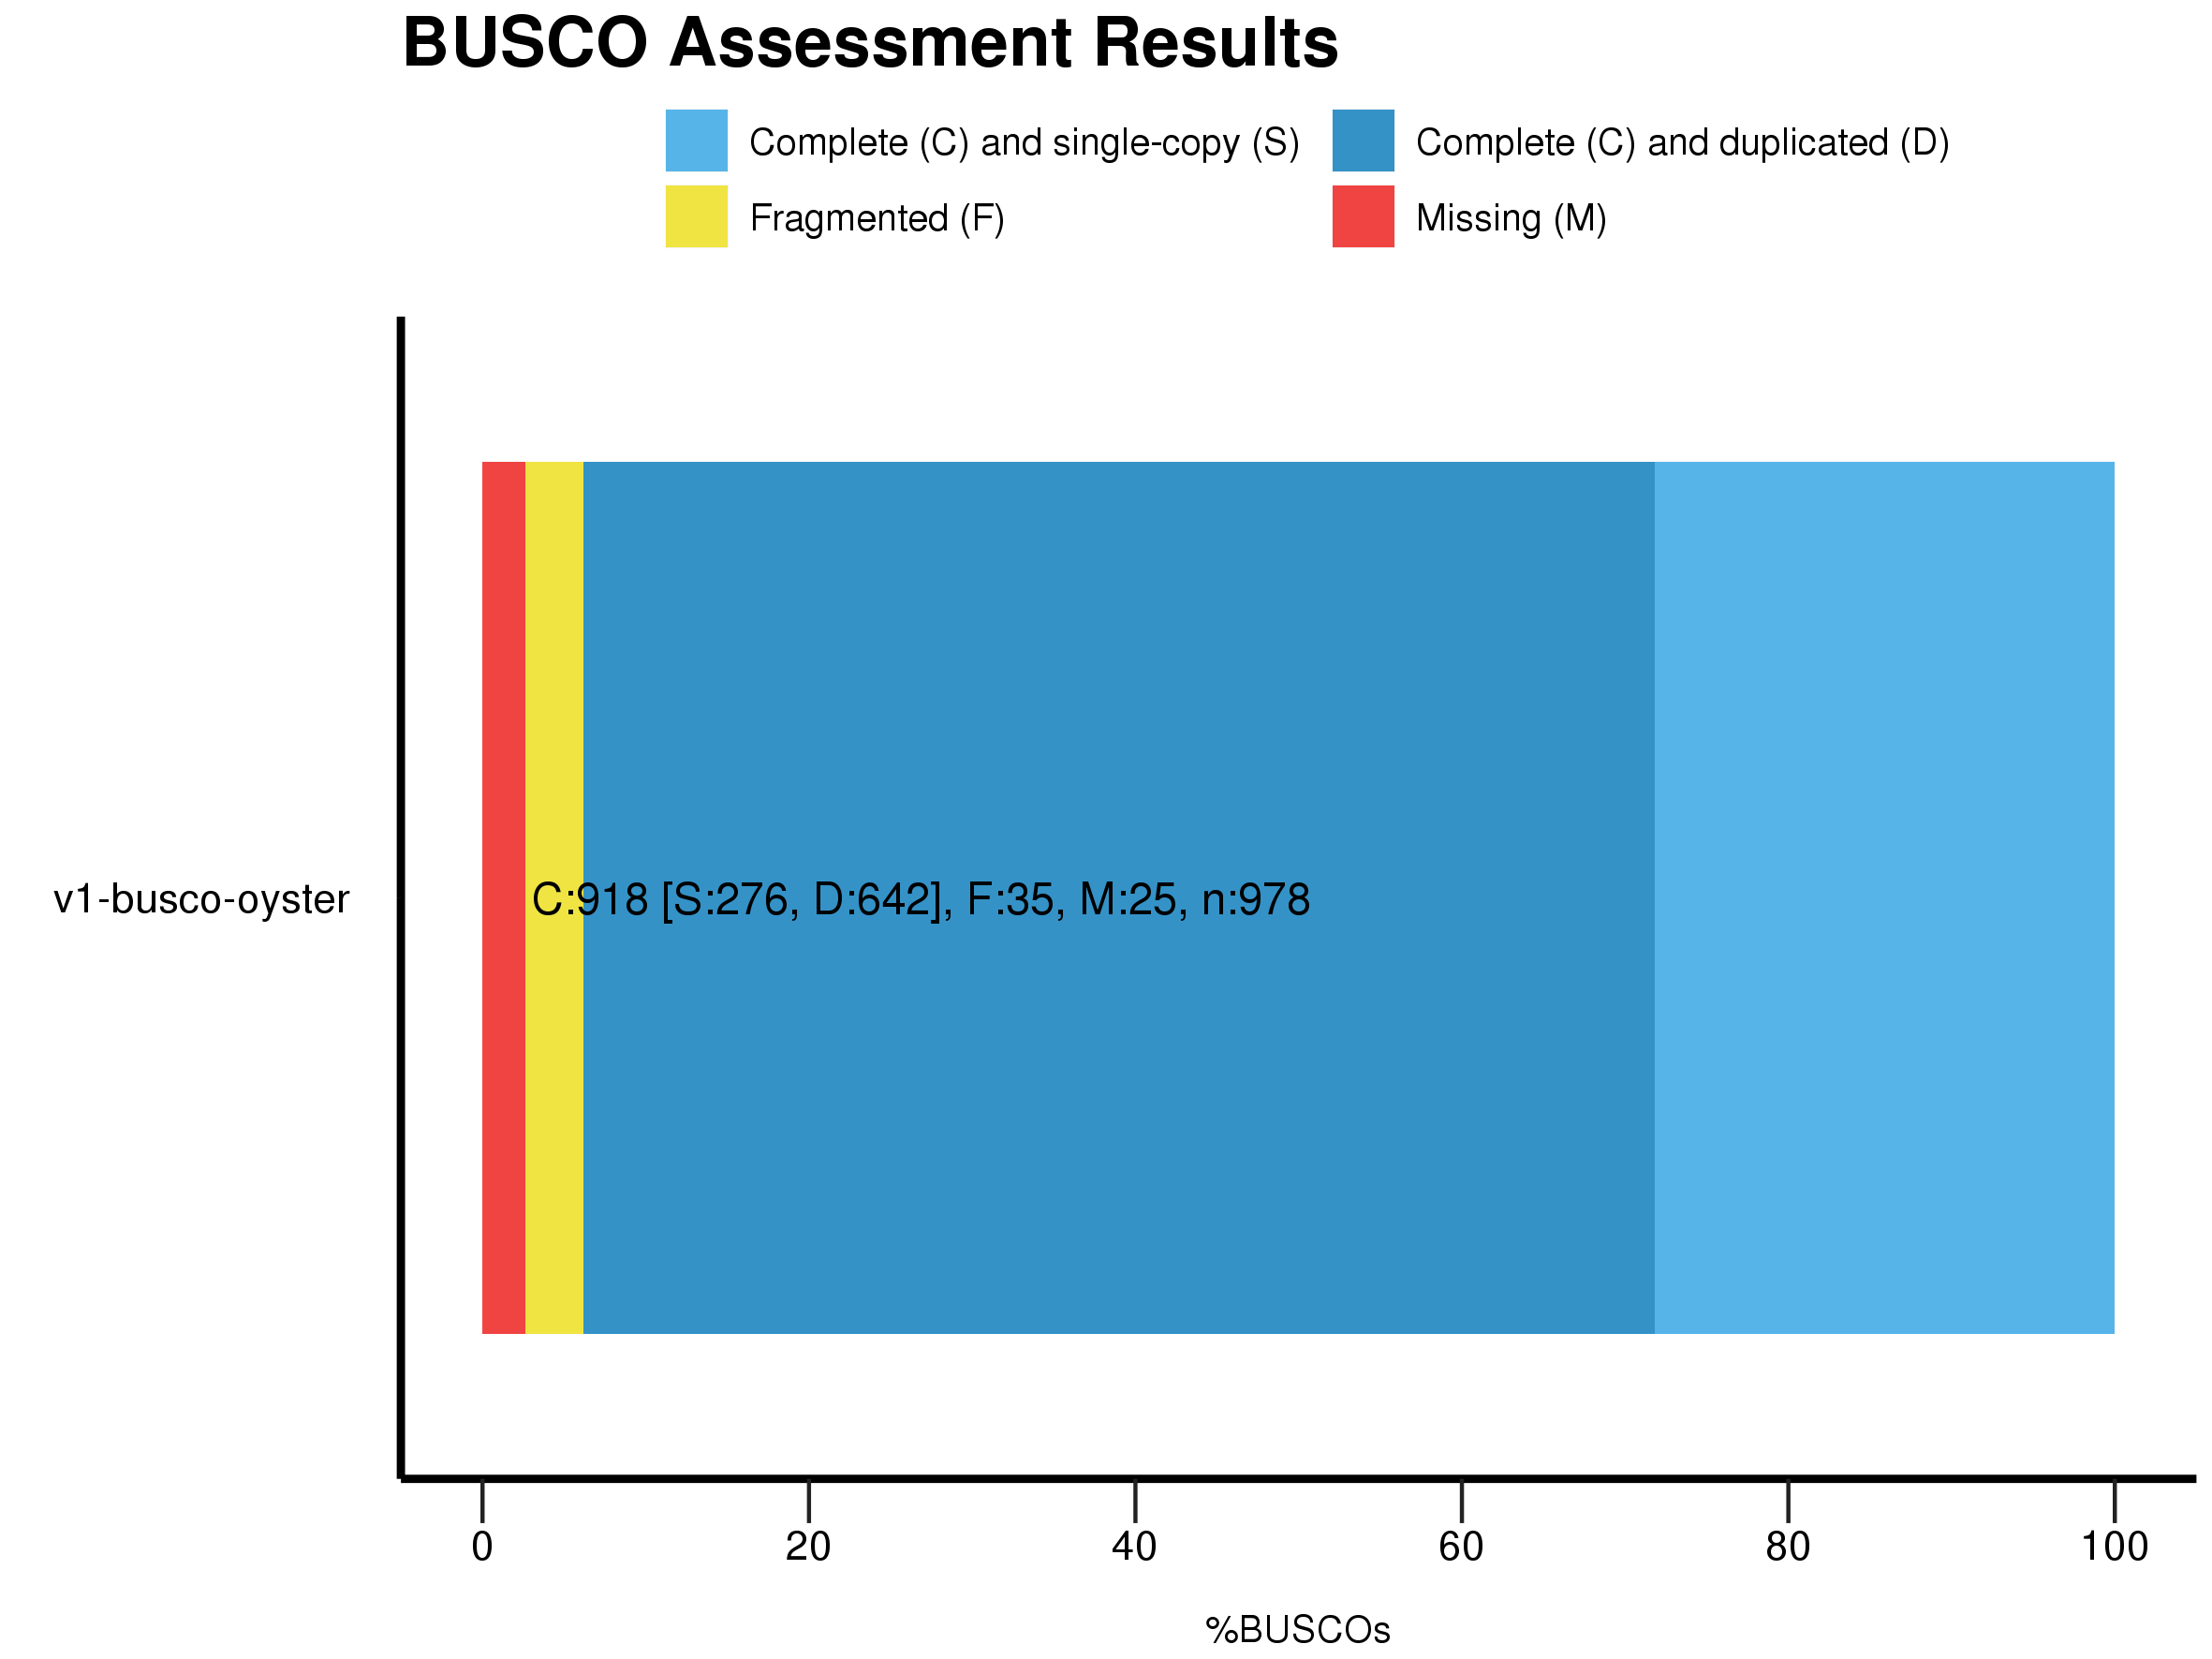

In [15]:
from IPython.display import Image
Image("run_v1-busco-oyster/summary_plots/busco_figure.png")

Compare oyster and scallop

In [16]:
%%sh
module load gcc/6.2.0
module load R/3.4.1
mkdir run_v1-busco-oyster/comp_summary_plots/

cp run_v1-busco-oyster/short_summary_v1-busco-oyster.txt run_v1-busco-oyster/comp_summary_plots/
cp ../Scallop/run_v1-busco/short_summary_v1-busco.txt run_v1-busco-oyster/comp_summary_plots/

BUSCO="/home/t.cri.ksilliman/Downloads/busco-master-c3aaf72e33f90932328f44b2e36469f2445918e0"

python $BUSCO/scripts/generate_plot.py -wd run_v1-busco-oyster/comp_summary_plots

INFO	****************** Start plot generation at 02/28/2018 09:33:02 ******************
INFO	Load data ...
INFO	Loaded short_summary_v1-busco-oyster.txt successfully
INFO	Loaded short_summary_v1-busco.txt successfully
INFO	Generate the R code ...
INFO	Run the R code ...
INFO	[Rscript]	[1] "Plotting the figure ..."
INFO	[Rscript]	[1] "Done"
INFO	[Rscript]	1 of 1 task(s) completed at 02/28/2018 09:33:05
INFO	Plot generation done. Total running time: 2.8721010685 seconds
INFO	Results written in run_v1-busco-oyster/comp_summary_plots/



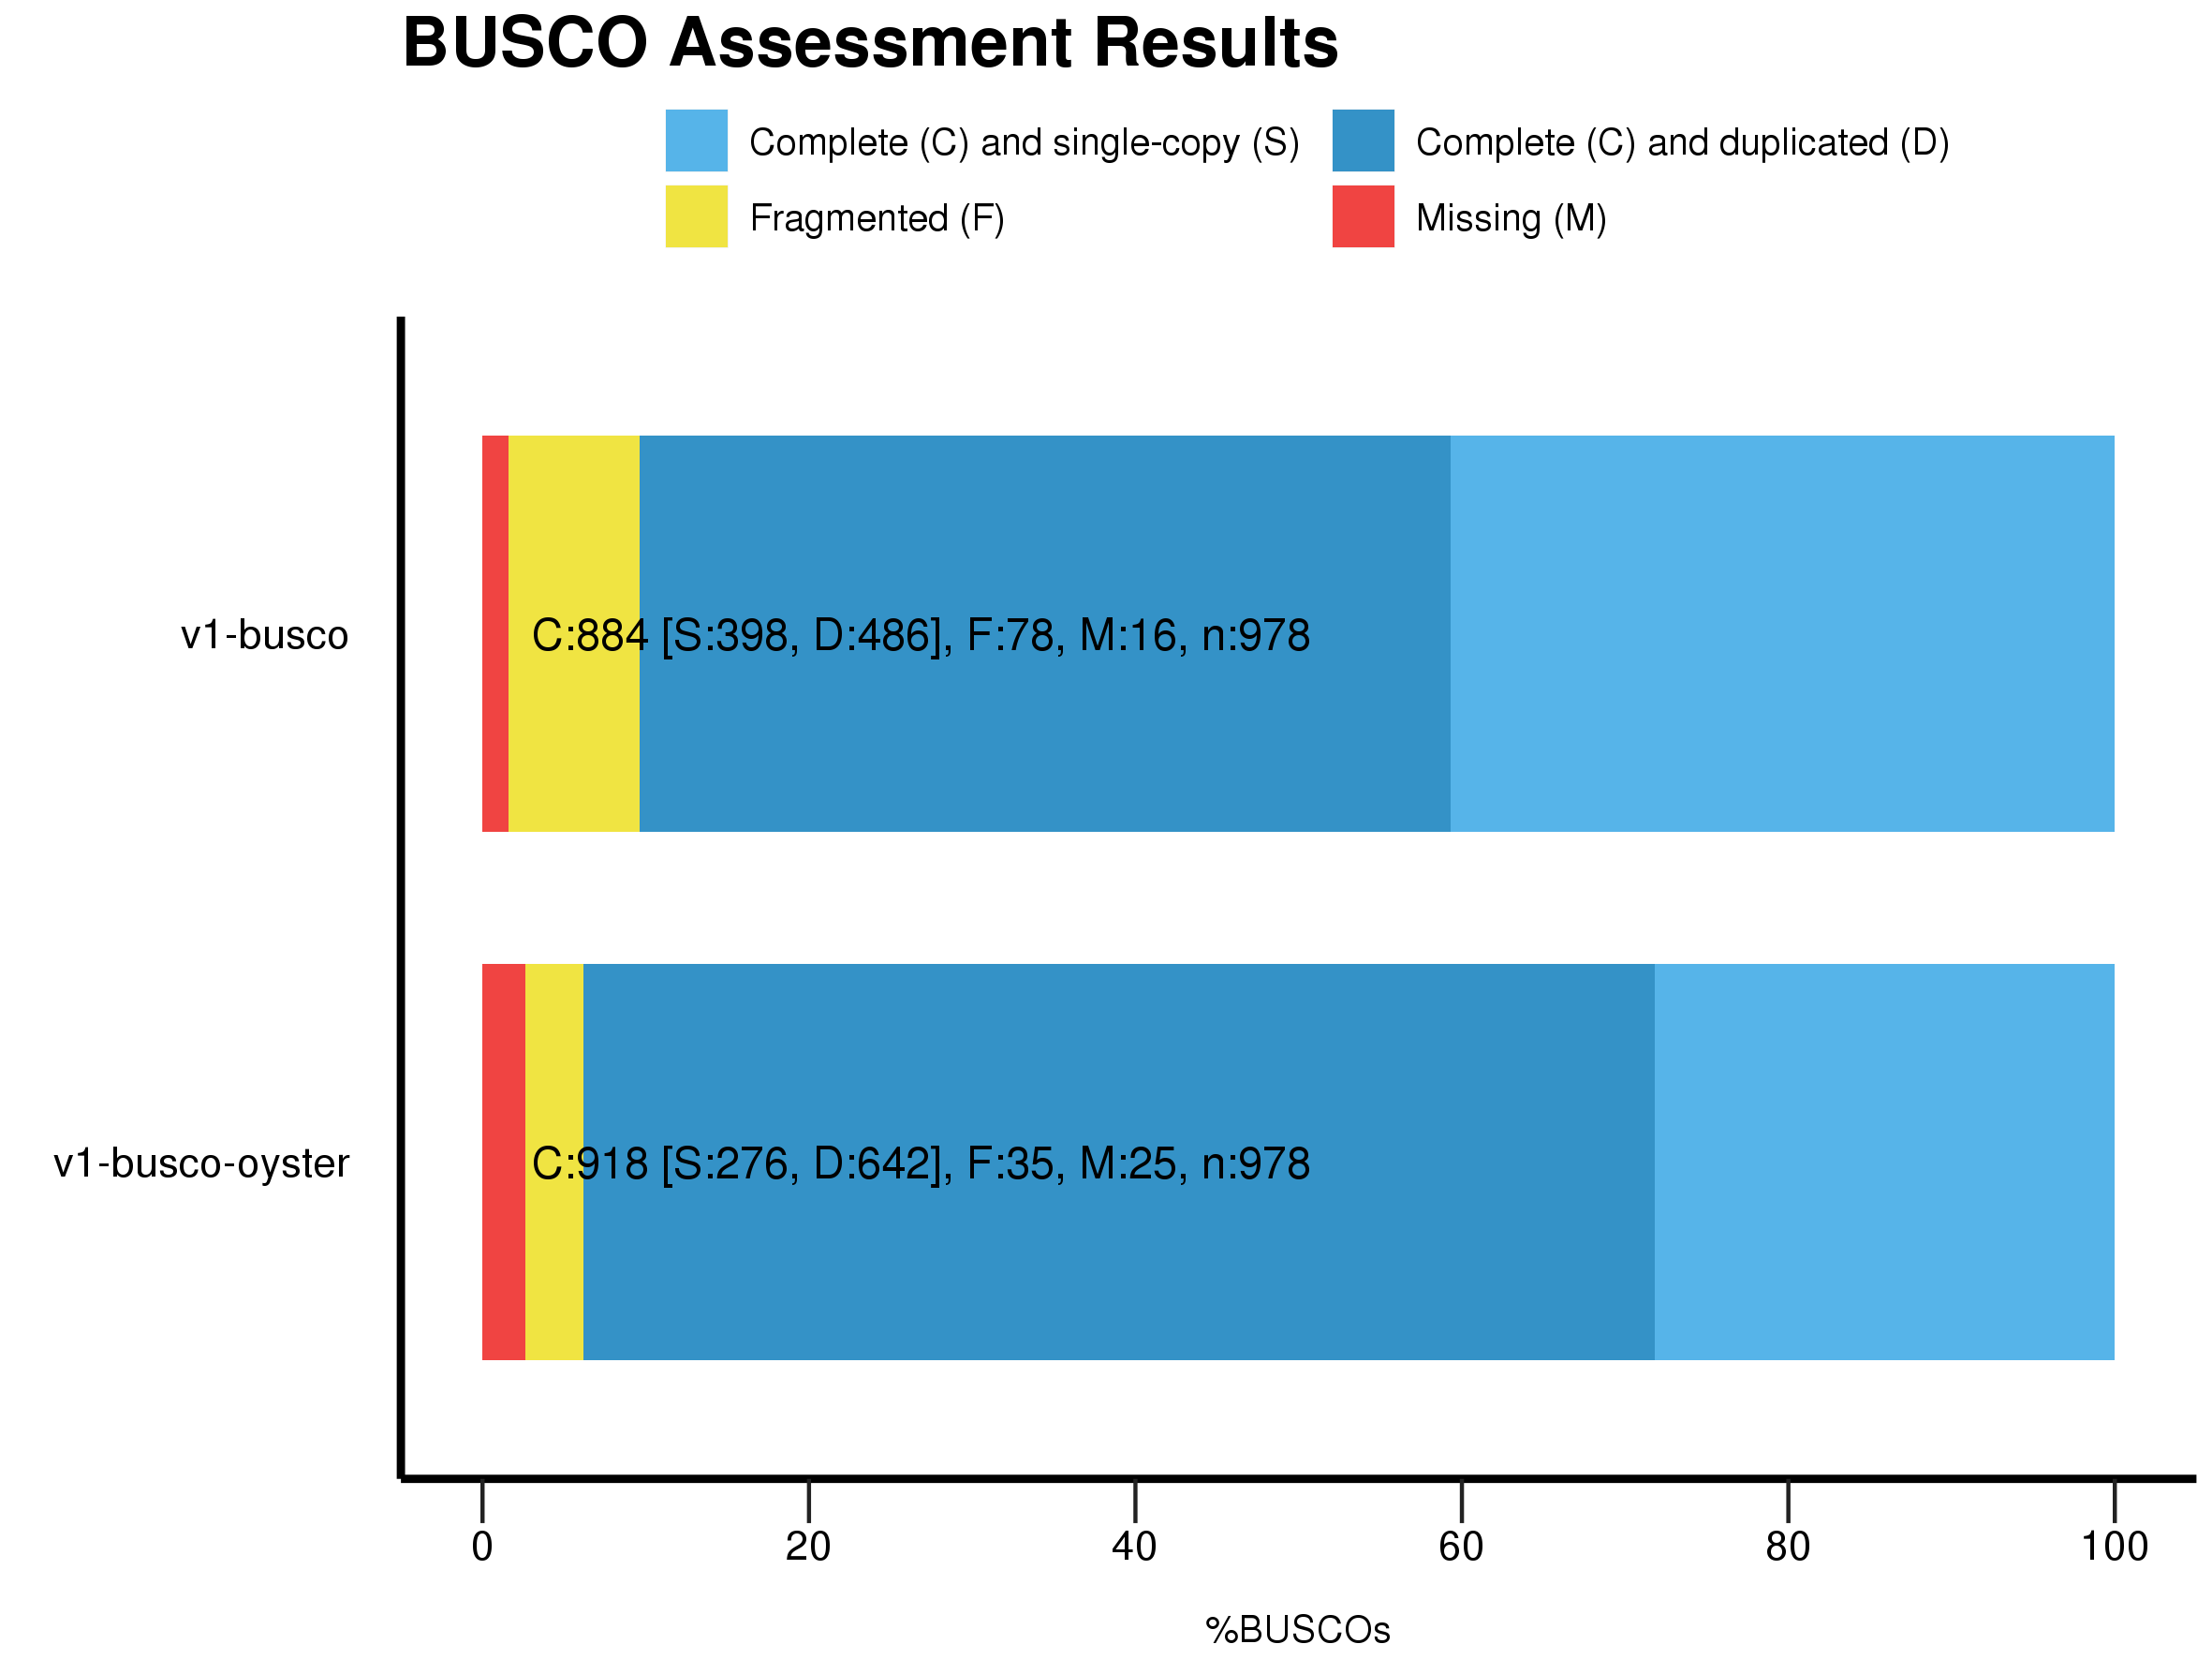

In [17]:
from IPython.display import Image
Image("run_v1-busco-oyster/comp_summary_plots/busco_figure.png")